In [247]:
#Read from CSV file

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('WiiSports.csv', sep = ',', encoding = 'latin-1')
del df['URL']

print(df)

        Run ID   User ID     User Name       Category  Hours  Minutes  Seconds Platform ID Platform Name  Verified        Date
0     0zn6p9yn  98rpndj1           RSR  Golf: 9 Holes    0.0      6.0    7.000    v06dk3e4           Wii  verified  2014-07-14
1     nz10qrme  18vml28l     TeighMart  Golf: 9 Holes    0.0      6.0   27.000    v06dk3e4           Wii  verified  2014-07-14
2     6yjk4lgm  5j5qknjv       Poshact     Pro Status    0.0     16.0   11.190    v06dk3e4           Wii  verified  2014-06-15
3     oy23qrwm  zx7wmv87       Plyd823  Golf: 9 Holes    0.0      7.0   58.000    v06dk3e4           Wii  verified  2014-09-12
4     7z0e528m  98rpndj1           RSR     All Sports    0.0     12.0   35.000    v06dk3e4           Wii  verified  2014-12-10
...        ...       ...           ...            ...    ...      ...      ...         ...           ...       ...         ...
1394  zplgg8gm  x7q359q8     Ducki_536     All Sports    0.0      8.0   24.350    v06dk3e4           Wii  verif

In [248]:
#Clean data

df = df.loc[(df['Category'] == 'All Sports') & (df['Verified'] == 'verified') & (df['Date'].notnull())]
df = df.rename({'User Name': 'userName'}, axis=1)
df = df.sort_values(["Date"])
del df['Verified']
del df['Run ID']
del df['User ID']

totalSeconds = []

for x in range(len(df)):
    seconds = 0.0
    seconds += (df.iloc[x].Hours * 3600) + (df.iloc[x].Minutes * 60) + (df.iloc[x].Seconds)
    totalSeconds.append(seconds)

df['TimeSeconds'] = totalSeconds
df = df[['userName', 'Category', 'Hours', 'Minutes', 'Seconds', 'TimeSeconds', 'Platform Name', 'Date']]

print(df)

           userName    Category  Hours  Minutes  Seconds  TimeSeconds Platform Name        Date
4               RSR  All Sports    0.0     12.0   35.000      755.000           Wii  2014-12-10
6           Plyd823  All Sports    0.0     11.0   16.000      676.000           Wii  2015-02-02
7               RSR  All Sports    0.0     10.0    5.000      605.000           Wii  2015-02-05
14       YaBoyBTrue  All Sports    0.0     11.0   27.000      687.000           Wii  2015-04-17
15    TheGlitched64  All Sports    0.0     15.0    2.000      902.000           Wii  2015-04-23
...             ...         ...    ...      ...      ...          ...           ...         ...
1384         YUSAMA  All Sports    0.0     10.0    1.000      601.000           Wii  2020-11-17
1387         YUSAMA  All Sports    0.0      9.0   17.000      557.000           Wii  2020-11-19
1388         Kev360  All Sports    0.0     28.0   26.000     1706.000           Wii  2020-11-20
1393      Ducki_536  All Sports    0.0  

           userName    Category  Hours  Minutes  Seconds  TimeSeconds Platform Name        Date
4               RSR  All Sports    0.0     12.0    35.00       755.00           Wii  2014-12-10
6           Plyd823  All Sports    0.0     11.0    16.00       676.00           Wii  2015-02-02
7               RSR  All Sports    0.0     10.0     5.00       605.00           Wii  2015-02-05
25         Nate9000  All Sports    0.0      9.0    26.00       566.00           Wii  2015-07-19
111  MrJimmysteel25  All Sports    0.0      9.0    16.09       556.09           Wii  2017-08-07
119       NicroVeda  All Sports    0.0      9.0    15.96       555.96           Wii  2017-08-10
160       Alaskaxp2  All Sports    0.0      9.0     4.11       544.11           Wii  2018-01-20
232       NicroVeda  All Sports    0.0      9.0     1.45       541.45           Wii  2018-07-21
235       Alaskaxp2  All Sports    0.0      8.0    43.27       523.27          WiiU  2018-07-22
284       Alaskaxp2  All Sports    0.0  

Text(0.5, 1.0, 'Wii Sports (All Sports) World Record Progression')

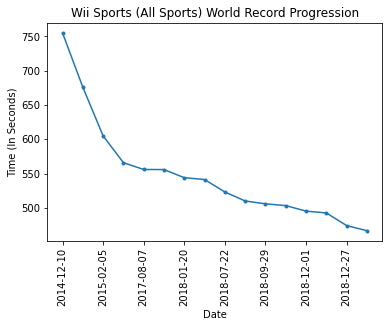

In [249]:
#Find World Record Progression

worldRecords = []
minTime = df.iloc[0].TimeSeconds

for x in range(len(df)):
    if df.iloc[x].TimeSeconds <= minTime:
        worldRecords.append(df.iloc[x])
        minTime = df.iloc[x].TimeSeconds

wrdf = pd.DataFrame(worldRecords)
print(wrdf)

wrdf.plot(kind = 'line', x = 'Date', y = 'TimeSeconds', rot = 90, legend = False, style='.-')
plt.ylabel("Time (In Seconds)")
plt.title("Wii Sports (All Sports) World Record Progression")

Number of improvements: 65
Number of same times: 71
Total runners: 136
            UserName  Fastest    First  PercentImprovement
135           Frank_  1753.00  1753.00           -0.000000
63        BOW-NINGEN   623.00   623.00           -0.000000
124  adderall_user67   956.00   956.00           -0.000000
61         EppuJoloZ   622.00   622.00           -0.000000
60        MrPogostyc   621.00   621.00           -0.000000
..               ...      ...      ...                 ...
19         DarthNiko   538.51   863.00           37.600232
59       ZacStickers   618.00   993.00           37.764350
120            Yanis   929.00  1795.00           48.245125
11        GamingLand   512.02  1083.43           52.740832
0          Alaskaxp2   466.90  1016.00           54.045276

[136 rows x 4 columns]


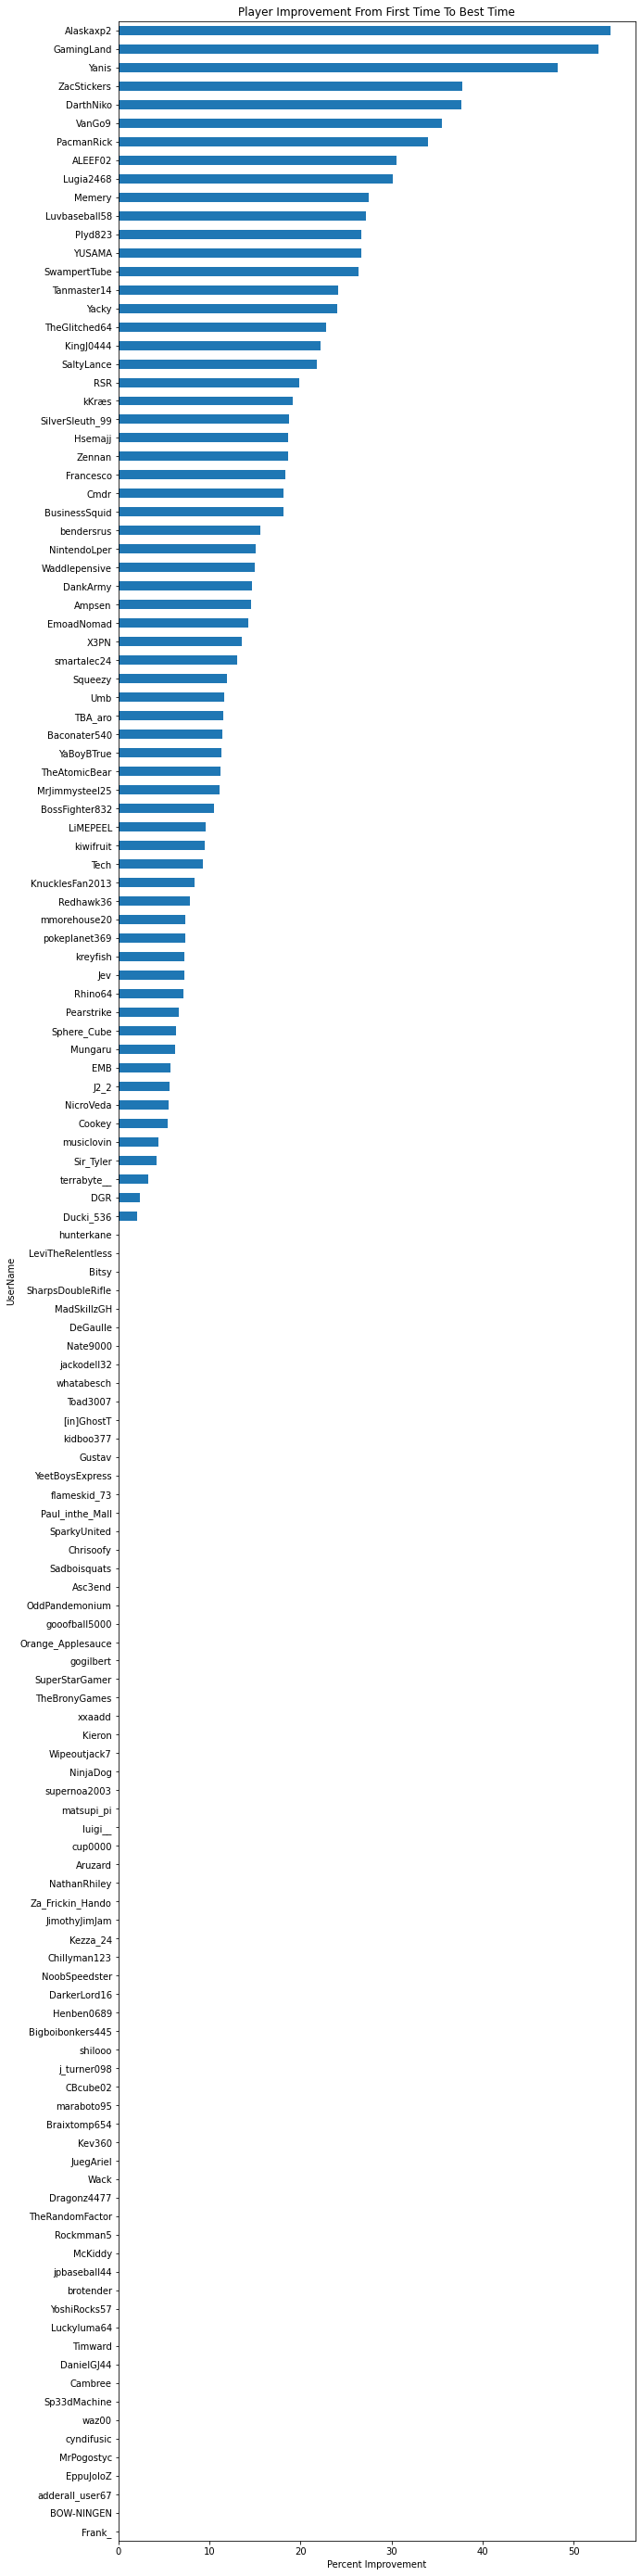

In [279]:
#Print Leadboard

rankingsFirst = df.sort_values(["Hours", "Minutes", "Seconds"])
rankingsFirst = rankingsFirst.drop_duplicates(subset = "userName")

rankingsLast = df.sort_values(["Date"])
rankingsLast = rankingsLast.drop_duplicates(subset = "userName")

quad = []

for x in range (len(rankingsFirst)):
    for y in range (len(rankingsLast)):
        if rankingsFirst.iloc[x].userName == rankingsLast.iloc[y].userName:
            fastest = rankingsFirst.iloc[x].TimeSeconds
            first = rankingsLast.iloc[y].TimeSeconds
            increase = (fastest - first) / first * 100
            increase = -increase
            quad.append((rankingsFirst.iloc[x].userName, fastest, first, increase))

count = 0
same = 0

for x in quad:
    if (x[1] < x[2]):
        count += 1
    elif (x[1] == x[2]):
        same += 1;
        
print("Number of improvements: " + str(count))
print("Number of same times: " + str(same))
print("Total runners: " + str(len(quad)))

improvementdf =  pd.DataFrame(quad, columns = ['UserName', 'Fastest', 'First', 'PercentImprovement'])
improvementdf = improvementdf.sort_values(["PercentImprovement"])
improvementdf.plot(kind = "barh", x = "UserName", y = "PercentImprovement", figsize = (10,50), legend = False)
plt.title("Player Improvement From First Time To Best Time")
plt.xlabel("Percent Improvement")
print(improvementdf)

      userName    Category  Hours  Minutes  Seconds  TimeSeconds Platform Name        Date
125  Alaskaxp2  All Sports    0.0     16.0    56.00      1016.00           Wii  2017-08-21
130  Alaskaxp2  All Sports    0.0      9.0    43.67       583.67           Wii  2017-11-04
160  Alaskaxp2  All Sports    0.0      9.0     4.11       544.11           Wii  2018-01-20
235  Alaskaxp2  All Sports    0.0      8.0    43.27       523.27          WiiU  2018-07-22
284  Alaskaxp2  All Sports    0.0      8.0    30.17       510.17          WiiU  2018-08-15
333  Alaskaxp2  All Sports    0.0      8.0    26.00       506.00          WiiU  2018-09-29
375  Alaskaxp2  All Sports    0.0      8.0    23.46       503.46          WiiU  2018-11-15
402  Alaskaxp2  All Sports    0.0      8.0    15.37       495.37          WiiU  2018-12-01
412  Alaskaxp2  All Sports    0.0      8.0    12.74       492.74          WiiU  2018-12-15
420  Alaskaxp2  All Sports    0.0      7.0    54.30       474.30          WiiU  2018-12-27

Text(0.5, 1.0, 'Wii Sports (All Sports) bendersrus Progression')

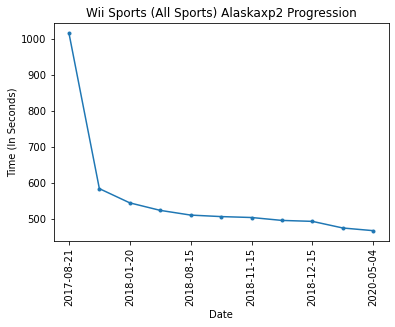

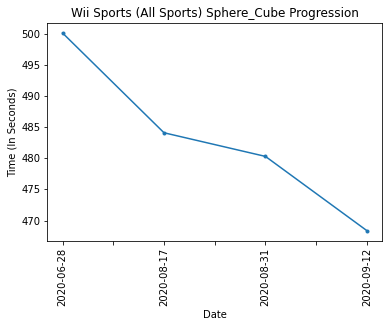

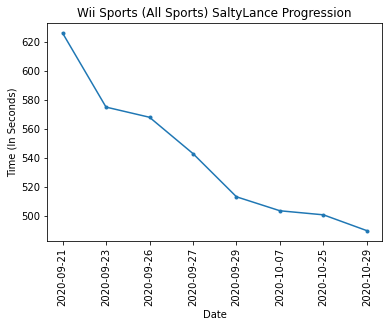

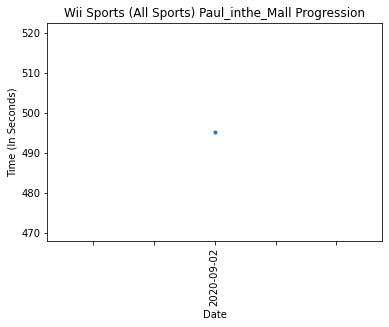

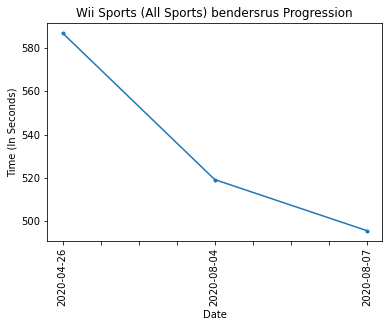

In [230]:
#Graph 5 Fastest Players

wrhdf = df.loc[df['userName'] == 'Alaskaxp2']
print(wrhdf)
wrhdf.plot(kind = 'line', x = 'Date', y = 'TimeSeconds', rot = 90, legend = False, style='.-')
plt.ylabel("Time (In Seconds)")
plt.title("Wii Sports (All Sports) Alaskaxp2 Progression")

wrhdf = df.loc[df['userName'] == 'Sphere_Cube']
print(wrhdf)
wrhdf.plot(kind = 'line', x = 'Date', y = 'TimeSeconds', rot = 90, legend = False, style='.-')
plt.ylabel("Time (In Seconds)")
plt.title("Wii Sports (All Sports) Sphere_Cube Progression")

wrhdf = df.loc[df['userName'] == 'SaltyLance']
print(wrhdf)
wrhdf.plot(kind = 'line', x = 'Date', y = 'TimeSeconds', rot = 90, legend = False, style='.-')
plt.ylabel("Time (In Seconds)")
plt.title("Wii Sports (All Sports) SaltyLance Progression")

wrhdf = df.loc[df['userName'] == 'Paul_inthe_Mall']
print(wrhdf)
wrhdf.plot(kind = 'line', x = 'Date', y = 'TimeSeconds', rot = 90, legend = False, style='.-')
plt.ylabel("Time (In Seconds)")
plt.title("Wii Sports (All Sports) Paul_inthe_Mall Progression")

wrhdf = df.loc[df['userName'] == 'bendersrus']
print(wrhdf)
wrhdf.plot(kind = 'line', x = 'Date', y = 'TimeSeconds', rot = 90, legend = False, style='.-')
plt.ylabel("Time (In Seconds)")
plt.title("Wii Sports (All Sports) bendersrus Progression")

Text(0.5, 1.0, 'WiiSports Platform Distribution')

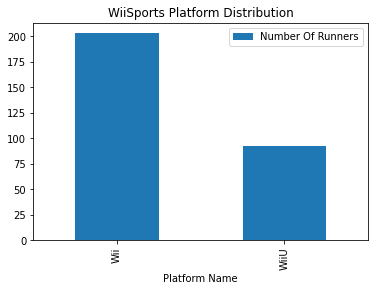

In [280]:

wiiCount = np.count_nonzero(df['Platform Name']=='Wii')
wiiUCount = np.count_nonzero(df['Platform Name']=='WiiU')

platformsArray = ([ ['Wii', wiiCount], ['WiiU', wiiUCount]])
platformdf = pd.DataFrame(data = platformsArray, columns = ['Platform Name', 'Number Of Runners'])

platformdf.plot(kind = 'bar', x='Platform Name', y='Number Of Runners', legend = True)
plt.title("WiiSports Platform Distribution")

Text(0.5, 1.0, 'Wii Sports Quantity of Runs by Year')

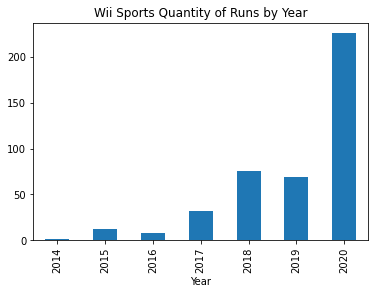

In [282]:
count2014 = np.count_nonzero(df['Date'] < '2015-01-01')
count2015 = np.count_nonzero(df['Date'] < '2016-01-01') - count2014
count2016 = np.count_nonzero(df['Date'] < '2017-01-01') - count2015
count2017 = np.count_nonzero(df['Date'] < '2018-01-01') - count2016
count2018 = np.count_nonzero(df['Date'] < '2019-01-01') - count2017
count2019 = np.count_nonzero(df['Date'] < '2020-01-01') - count2018
count2020 = np.count_nonzero(df['Date']) - count2019

monthsArray = ([ ['2014', count2014], ['2015', count2015], ['2016', count2016], ['2017', count2017], ['2018', count2018], ['2019', count2019], ['2020', count2020]])
monthsdf = pd.DataFrame(data = monthsArray, columns = ['Year', 'Number of Runs Submitted'])

monthsdf.plot(kind = 'bar', x = 'Year', y='Number of Runs Submitted', legend = False)
plt.title("Wii Sports Quantity of Runs by Year")